In [1]:
import numpy as np                    #here we load numpy
import matplotlib.pyplot as plt   #here we load matplotlib
import time                   #and load some utilities
from numba import njit

In [2]:
@njit(fastmath=True)
def solve_1d_Linear_convec():

    nx = 2001  # try changing this number from 41 to 81 and Run All ... what happens?
    dx = 2 / (nx-1)
    nt = 1500    #nt is the number of timesteps we want to calculate
    dt = 0.0004
    grid = np.linspace(0,2,nx) # creating the space grid
    
    u0 = np.ones(nx)      #numpy function ones()
    u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    u = u0.copy()
    
    
    for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    
   
    un = np.ones(nx) #initialize a temporary array
    
    return u0, u, grid

In [3]:
#compute the cpu time of the solving 1d linear convection
start = time.time()
u0, u, grid = solve_1d_Linear_convec()
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )   

Execution time is : 437.4387264251709 ms


Text(0.5, 1.0, '1D Nonlinear Convection')

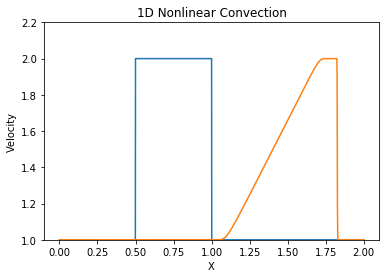

In [4]:
#Plotting data
plt.plot(grid,u0)
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Nonlinear Convection')